In [29]:
%reset -f
%matplotlib inline

In [30]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.image as mpimg
import mpl_toolkits.mplot3d as mplot3d

In [31]:
pd.options.display.float_format = "{:.4f}".format

In [32]:
mat = sio.loadmat("data/ex7data2.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [33]:
x = mat["X"]

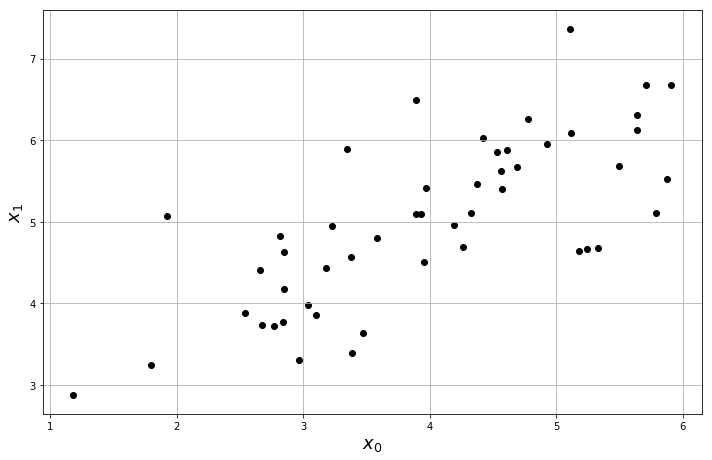

In [34]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x = x[:,0], y = x[:,1], c = "k")
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [35]:
pca = sbbml.PCA(k = 1)
pca.fit(x)

In [36]:
pca.eigen_vectors

array([[0.70710678],
       [0.70710678]])

In [37]:
pca.eigen_values

array([1.77094936])

In [38]:
x_reduced = pca.transform(x)
x_reduced[:10,]

array([[-1.49631261],
       [ 0.92218067],
       [-1.22439232],
       [-1.64386173],
       [-1.2732206 ],
       [ 0.97681976],
       [-1.26881187],
       [ 2.34148278],
       [ 0.02999141],
       [ 0.78171789]])

In [39]:
x_prime = pca.inverse_transform(x_reduced)
x_prime[:10,]

array([[2.76059072, 3.93086928],
       [4.74650005, 5.66344266],
       [2.98387397, 4.12566901],
       [2.63943298, 3.82516723],
       [2.94377936, 4.09068914],
       [4.79136612, 5.70258531],
       [2.94739952, 4.09384749],
       [5.9119386 , 6.68021003],
       [4.01389227, 5.02429126],
       [4.63116115, 5.56281717]])

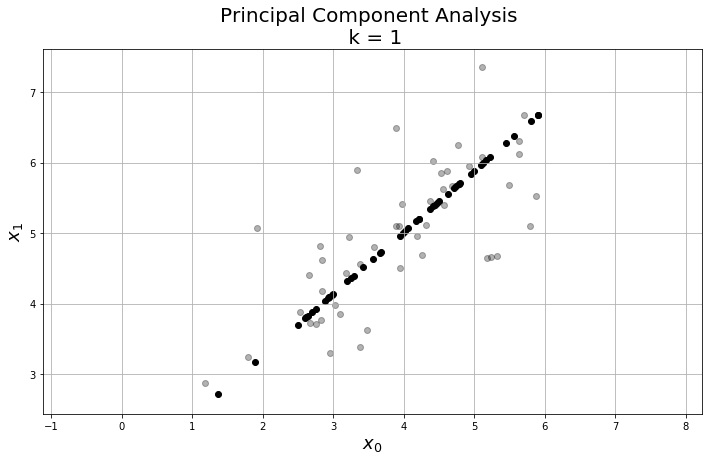

In [40]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x = x[:,0], y = x[:,1], c = "k", alpha = 0.3)
ax.scatter(x_prime[:,0], x_prime[:,1], c = "k")
ax.set_title("Principal Component Analysis \n k = 1", fontsize = 20)
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()
plt.axis("equal")
plt.show()

In [41]:
mat = sio.loadmat("data/ex7faces.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [42]:
x = mat["X"]

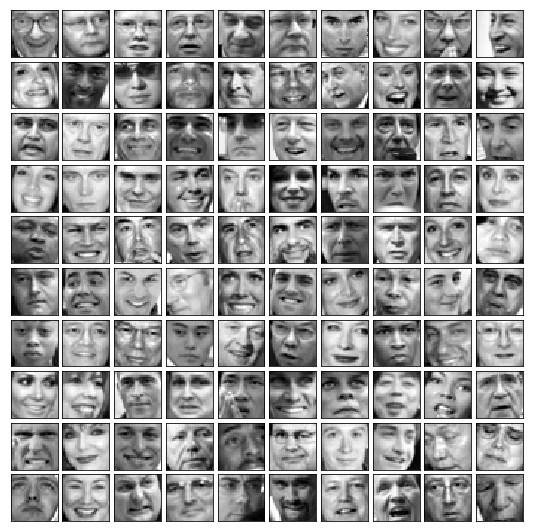

In [43]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

k = 0
for i in range(nrows):
    for j in range(ncols):
        img = np.transpose(x[k].reshape(32, 32))
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)
        k = k + 1

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [44]:
pca = sbbml.PCA(k = 100)
pca.fit(x)

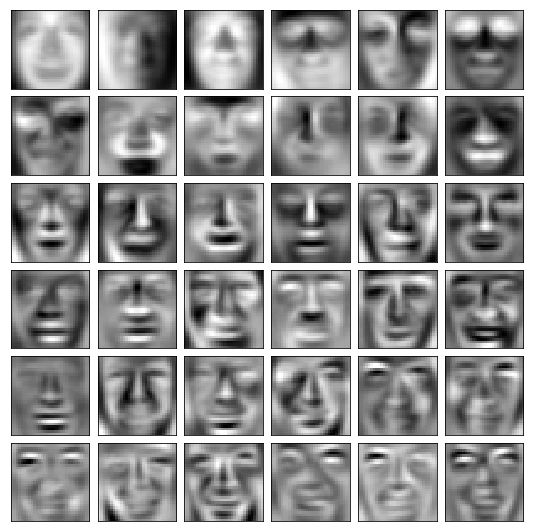

In [45]:
nrows = 6
ncols = 6

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

k = 0
for i in range(nrows):
    for j in range(ncols):
        img = np.transpose(pca.eigen_vectors[:,k].reshape(32, 32))
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)
        k = k + 1

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [46]:
x_reduced = pca.transform(x)
x_prime   = pca.inverse_transform(x_reduced)

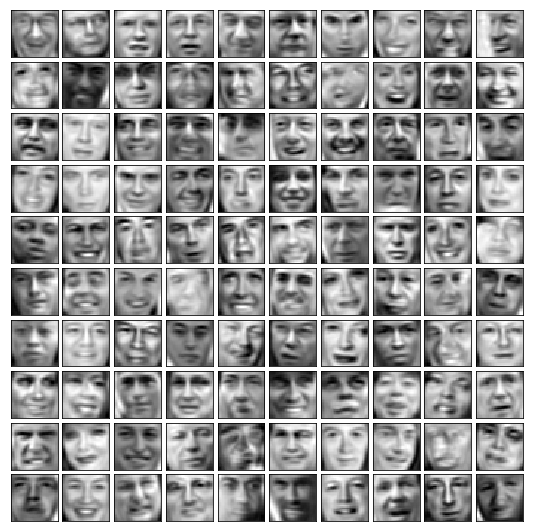

In [47]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

k = 0
for i in range(nrows):
    for j in range(ncols):
        img = np.transpose(x_prime[k].reshape(32, 32))
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)
        k = k + 1

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

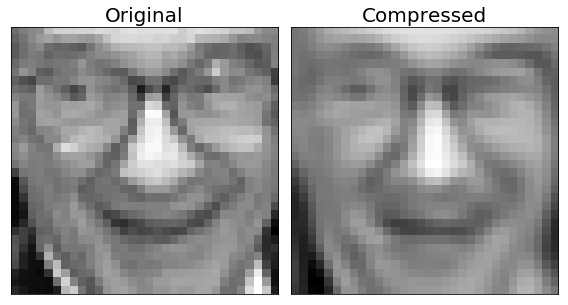

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True, figsize = (8, 8))
ax[0].imshow(np.transpose(x[0].reshape(32, 32)), cmap = "gray")
ax[1].imshow(np.transpose(x_prime[0].reshape(32, 32)), cmap = "gray")
ax[0].set_title("Original", fontsize = 20)
ax[1].set_title("Compressed", fontsize = 20)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)

plt.show()

In [49]:
img = mpimg.imread("data/bird-small.png")

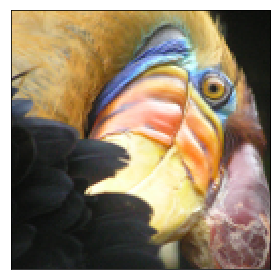

In [50]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [51]:
m = img.shape[0]
n = img.shape[1]

x = img.reshape(m * n, 3)

In [52]:
model = sbbml.KMeans(k = 16, iterations = 1000)
model.fit(x)

In [53]:
index  = np.random.randint(m * n, size = 1000)
x_rand = x[index]
colors = model.classes[index]

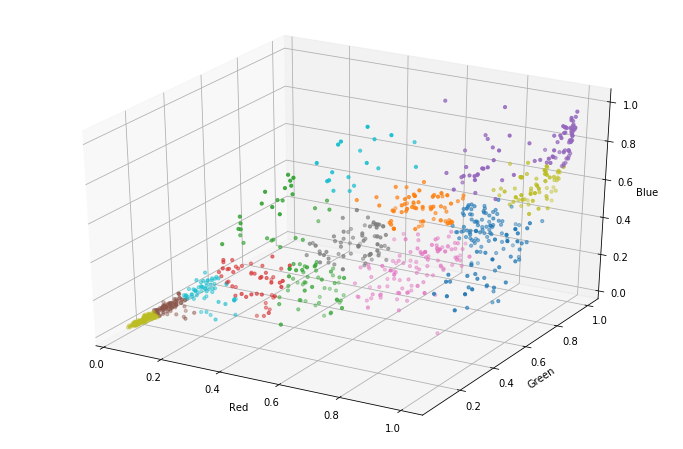

In [54]:
r = x_rand[:,0]
g = x_rand[:,1]
b = x_rand[:,2]

fig = plt.figure(figsize = (12.0, 8.0))
ax = plt.axes(projection = "3d")
ax.scatter(r, g, b, c = colors, cmap = "tab10", marker = "o", s = 10)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

In [55]:
pca = sbbml.PCA(k = 2)
pca.fit(x)
x_reduced = pca.transform(x_rand)

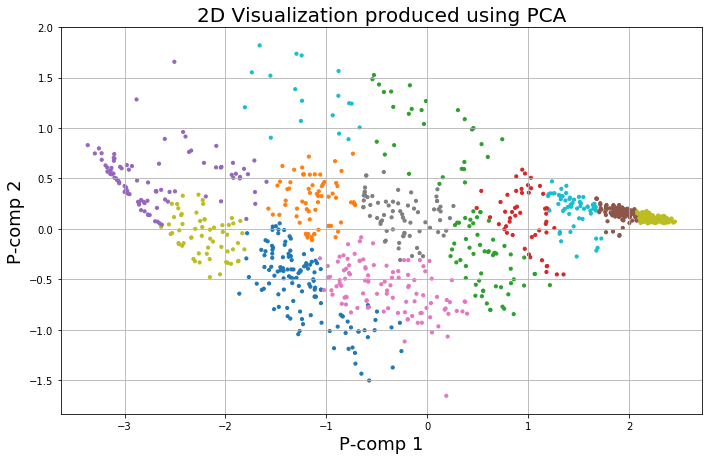

In [56]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x = x_reduced[:,0], y = x_reduced[:,1], c = colors, cmap = "tab10", s = 10)
ax.set_title("2D Visualization produced using PCA", fontsize = 20)
ax.set_xlabel("P-comp 1", fontsize = 18)
ax.set_ylabel("P-comp 2", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()
plt.axis("equal")
plt.show()